<a href="https://www.kaggle.com/code/mitrabrindamukherjee/krishivision?scriptVersionId=250469873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plantseedlings/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/fd87b36ae.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/0e8492cb1.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/8d6acbe9b.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/54b3afd58.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/6049234e6.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/82b5f4d33.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/a0f37c726.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/e0ec5b6a1.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/1cfd91582.png
/kaggle/input/plantseedlings/input/plant-seedlings-classification/test/456d507c0.png
/kaggle/input/plantseedlings/input/plant-seedlings-classificat

In [2]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from glob import glob

In [3]:
# # Define the dataset directory
# data_dir = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'

# # List all subdirectories (classes) in the dataset directory
# classes = os.listdir(data_dir)
# print(f"Classes: {classes}")

In [4]:
# # Count images in each class
# image_count = {cls: len(glob(os.path.join(data_dir, cls, '*.jpg'))) for cls in classes}
# print("Number of images per class:")
# print(image_count)

In [5]:
# # Visualize the number of images per class
# pd.Series(image_count).sort_values().plot(kind='barh')
# plt.title('Number of Images per Class')
# plt.show()

In [6]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# # Define parameters
# IMG_SIZE = 224
# BATCH_SIZE = 32

# # Create an ImageDataGenerator for training, validation, and test sets
# datagen = ImageDataGenerator(
#     rescale=1.0/255.0,
#     validation_split=0.3,  # 70% training, 30% validation
#     rotation_range=50,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     shear_range=0.3,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
# # Training and validation generators
# train_generator = datagen.flow_from_directory(
#     data_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     subset='training'
# )

# val_generator = datagen.flow_from_directory(
#     data_dir,
#     target_size=(IMG_SIZE, IMG_SIZE),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical',
#     subset='validation'
# )

In [9]:
# import tensorflow as tf
# import urllib.request
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model

In [10]:
# # Define the input layer with the required input shape
# input_tensor = Input(shape=(224, 224, 3))

In [11]:
# # Load MobileNetV2 with pre-trained weights

# base_model = VGG16(weights='/kaggle/input/plantseedlings/input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_tensor=input_tensor)

In [12]:
# # Freeze the base layers
# for layer in base_model.layers:
#     layer.trainable = False

In [13]:
# # Add global average pooling after the base model
# x = GlobalAveragePooling2D()(base_model.output)

# # Add custom dense layers on top
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# output_tensor = Dense(30, activation='softmax')(x)

In [14]:
# model = Model(inputs=input_tensor, outputs=output_tensor)

In [15]:
# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()

In [16]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # Define Early Stopping callback
# early_stopping = EarlyStopping(
#     monitor='val_loss',        # or 'val_accuracy'
#     patience=5,                # Number of epochs with no improvement
#     restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
# )

# # Define ModelCheckpoint callback
# checkpoint = ModelCheckpoint(
#     'best_model.keras',
#     monitor='val_accuracy',   # Monitor validation accuracy
#     verbose=1,
#     save_best_only=True,       # Save only the best model
#     mode='max'                # Mode for monitoring, max for accuracy
# )

In [17]:
# # Train the model
# history = model.fit(
#     train_generator,
#     epochs=20,
#     validation_data=val_generator,
#     callbacks=[early_stopping, checkpoint]
# )

In [18]:
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns

In [19]:
# # Load the best model
# model.load_weights('best_model.keras')

In [20]:
# # Evaluate on validation data
# val_loss, val_acc = model.evaluate(val_generator)
# print(f'Validation Accuracy: {val_acc}')

In [21]:
# model.evaluate(val_generator)

In [22]:
# # Predict on validation data
# y_pred = model.predict(val_generator)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = val_generator.classes

In [23]:
# # Classification report
# print(classification_report(y_true, y_pred_classes, target_names=classes))

In [24]:
# # Confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred_classes)
# sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
# plt.show()

In [25]:
# # Unfreeze the last few layers of the base model
# for layer in base_model.layers[-20:]:
#     layer.trainable = True

In [26]:
# # Recompile the model with a lower learning rate
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# # Train again with the unfrozen model
# history_fine_tune = model.fit(
#     train_generator,
#     epochs=10,  # Fine-tuning for a few more epochs
#     validation_data=val_generator,
#     callbacks=[early_stopping, checkpoint]
# )

In [28]:
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=50,
#     width_shift_range=0.3,
#     height_shift_range=0.3,
#     shear_range=0.3,
#     zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

In [29]:
# # Save the optimized and fine-tuned model
# model.save('final_model.keras')

In [30]:
# # Evaluate the model
# loss, accuracy = model.evaluate(val_generator)
# print(f'Test loss: {loss}')
# print(f'Test accuracy: {accuracy}')

In [31]:
# from tensorflow.keras.models import load_model

# # Load the model
# model = load_model('final_model.keras')

In [32]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# # Function to preprocess the input image
# def preprocess_input_image(img_path, target_size=(224, 224)):
    
#     # Load the image with target size
#     img = image.load_img(img_path, target_size=target_size)
    
#     # Convert the image to an array
#     img_array = image.img_to_array(img)
    
#     # Expand dimensions to match the shape the model expects (batch size, height, width, channels)
#     img_array = np.expand_dims(img_array, axis=0)
    
#     # Rescale the image (if the model was trained with rescaling, like dividing by 255)
#     img_array = img_array / 255.0
#     return img_array

In [33]:
# # List of class names (replace with your actual class names)
# class_names = ['tomato', 'chilli', 'clove', 'pineapple', 'vigna-radiati(Mung)', 'Olive-tree', 'papaya', 'Tobacco-plant', 'jute', 'jowar', 'gram', 'tea', 'maize', 'wheat', 'soyabean', 'Pearl_millet(bajra)', 'Lemon', 'Fox_nut(Makhana)', 'mustard-oil', 'sugarcane', 'almond', 'Cucumber', 'sunflower', 'cotton', 'banana', 'Cherry', 'cardamom', 'rice', 'Coffee-plant', 'coconut']

# def predict_crop_type(img_path):
#     # Preprocess the image
#     img_array = preprocess_input_image(img_path)
    
#     # Predict using the model
#     predictions = model.predict(img_array)
    
#     # Get the index of the highest probability class
#     predicted_class_index = np.argmax(predictions, axis=1)[0]
    
#     # Map the index to the class name
#     predicted_class = class_names[predicted_class_index]
    
#     print(f'The predicted crop type is: {predicted_class}')

# # Example usage
# predict_crop_type('/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cherry/image15.jpeg')

In [34]:
# import matplotlib.pyplot as plt

# def display_image_with_prediction(img_path):
#     # Load and preprocess the image
#     img_array = preprocess_input_image(img_path)[0]  # Remove batch dimension
    
#     # Predict crop type
#     predicted_class = predict_crop_type(img_path)
    
#     # Display the image
#     plt.imshow(img_array)
#     plt.title(f'Predicted Crop Type: {predicted_class}')
#     plt.axis('off')
#     plt.show()

# # Example usage
# display_image_with_prediction('/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cherry/image15.jpeg')

In [35]:
# def predict_top_k(img_path, k=3):
#     img_array = preprocess_input_image(img_path)
#     predictions = model.predict(img_array)
#     top_k_indices = np.argsort(predictions[0])[-k:][::-1]  # Indices of top K predictions
#     top_k_classes = [class_names[i] for i in top_k_indices]
#     top_k_probs = predictions[0][top_k_indices]
    
#     print("Top K Predictions:")
#     for i in range(k):
#         print(f"{top_k_classes[i]}: {top_k_probs[i]*100:.2f}%")

In [36]:
# # Function to predict top K classes for an input image
# def predict_top_k(img_path, k=3):
    
#     # Step 1: Preprocess the image
#     img_array = preprocess_input_image(img_path)
#     print(f"Preprocessed image shape: {img_array.shape}")  # Debugging line

#     # Step 2: Predict using the model
#     predictions = model.predict(img_array, verbose=1)  # Add verbose for prediction status
#     print(f"Raw Predictions: {predictions}")  # Debugging line

#     # Step 3: Compute top K predictions
#     top_k_indices = np.argsort(predictions[0])[-k:][::-1]
#     print(f"Top K Indices: {top_k_indices}")  # Debugging line
    
#     top_k_classes = [class_names[i] for i in top_k_indices]
#     print(f"Top K Classes: {top_k_classes}")  # Debugging line

#     top_k_probs = predictions[0][top_k_indices]
#     print(f"Top K Probabilities: {top_k_probs}")  # Debugging line

#     # Display Top K Predictions
#     print("Top K Predictions:")
#     for i in range(k):
#         print(f"{top_k_classes[i]}: {top_k_probs[i] * 100:.2f}%")

In [37]:
# img_path = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cherry/image15.jpeg'  # Replace with the path to your test image
# predict_top_k(img_path, k=3)  # Predict the top 3 classes

In [38]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])
# plt.legend(loc='lower right')
# plt.show()

# 

In [39]:
# Step 1: Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [40]:
# Step 2: Dataset Path
data_dir = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops'

# List of class names
classes = [cls for cls in os.listdir(data_dir) if len(glob(os.path.join(data_dir, cls, '*.jpg'))) > 0]
print(f"Classes ({len(classes)}): {classes}")

Classes (29): ['tomato', 'clove', 'pineapple', 'vigna-radiati(Mung)', 'Olive-tree', 'coconut', 'papaya', 'Tobacco-plant', 'jute', 'jowar', 'gram', 'tea', 'maize', 'wheat', 'soyabean', 'Pearl_millet(bajra)', 'Lemon', 'Fox_nut(Makhana)', 'mustard-oil', 'sugarcane', 'almond', 'Cucumber', 'sunflower', 'cotton', 'banana', 'Cherry', 'cardamom', 'rice', 'Coffee-plant']


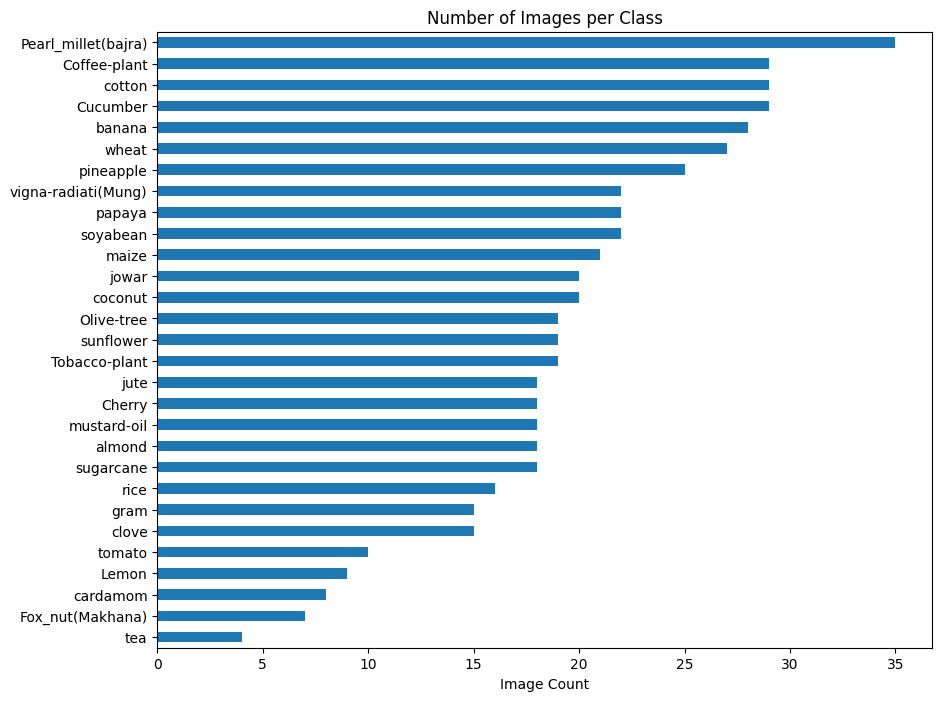

In [41]:
# Step 3: Image Count per Class (Visualization)
image_count = {cls: len(glob(os.path.join(data_dir, cls, '*.jpg'))) for cls in classes}
pd.Series(image_count).sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Number of Images per Class')
plt.xlabel("Image Count")
plt.show()

In [42]:
# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Define the image generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create the generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


In [43]:
# # Step 5: Model Architecture
# base_model = MobileNetV2(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
# for layer in base_model.layers:
#     layer.trainable = False

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# predictions = Dense(len(classes), activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [44]:
# # Step 6: Train the Model
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=50,
#     callbacks=[early_stop, checkpoint]
# )

In [45]:
# # Step 7: Evaluate Model
# model = load_model('best_model.keras')

# loss, accuracy = model.evaluate(val_generator)
# print(f"Validation Accuracy: {accuracy * 100:.2f}%")

In [46]:
# # Step 8: Detailed Classification Report & Confusion Matrix
# true_classes = val_generator.classes
# class_labels = list(val_generator.class_indices.keys())

# pred_probs = model.predict(val_generator)
# pred_classes = np.argmax(pred_probs, axis=1)

# print(classification_report(true_classes, pred_classes, target_names=class_labels))

# conf_mat = confusion_matrix(true_classes, pred_classes)
# plt.figure(figsize=(14, 12))
# sns.heatmap(conf_mat, annot=False, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()


In [47]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights=None, include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
print("Generator class count:", train_generator.num_classes)
print("Model output shape:", model.output_shape[-1])

Generator class count: 30
Model output shape: 30


In [49]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.0297 - loss: 3.4017 - val_accuracy: 0.0323 - val_loss: 3.3999
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0303 - loss: 3.4004 - val_accuracy: 0.0387 - val_loss: 3.3988
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0408 - loss: 3.3980 - val_accuracy: 0.0452 - val_loss: 3.3972
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0429 - loss: 3.3982 - val_accuracy: 0.0452 - val_loss: 3.3958
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0442 - loss: 3.3965 - val_accuracy: 0.0452 - val_loss: 3.3944
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0491 - loss: 3.3939 - val_accuracy: 0.0452 - val_loss: 3.3928
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0533 - loss: 3.3945 - val_accuracy: 0.0452 - val_loss: 3.3924
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0384 - loss: 3.3933 - val_accuracy: 0.0452 - val_loss: 3.3921
Epo

In [50]:
from tensorflow.keras.models import load_model

# Load the best model (if not already in memory)
model = load_model('best_model.keras')

# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 867ms/step - accuracy: 0.0598 - loss: 3.3953
Validation Accuracy: 4.52%
Validation Loss: 3.3972


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
Classification Report:
                     precision    recall  f1-score   support

             Cherry       0.00      0.00      0.00         6
       Coffee-plant       0.00      0.00      0.00         5
           Cucumber       0.00      0.00      0.00         6
   Fox_nut(Makhana)       0.00      0.00      0.00         4
              Lemon       0.00      0.00      0.00         5
         Olive-tree       0.00      0.00      0.00         6
Pearl_millet(bajra)       0.05      1.00      0.09         7
      Tobacco-plant       0.00      0.00      0.00         6
             almond       0.00      0.00      0.00         4
             banana       0.00      0.00      0.00         6
           cardamom       0.00      0.00      0.00         4
             chilli       0.00      0.00      0.00         4
              clove       0.00      0.00      0.00         6
            coconut       0.00      0.00      0.00         5
             cotton      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


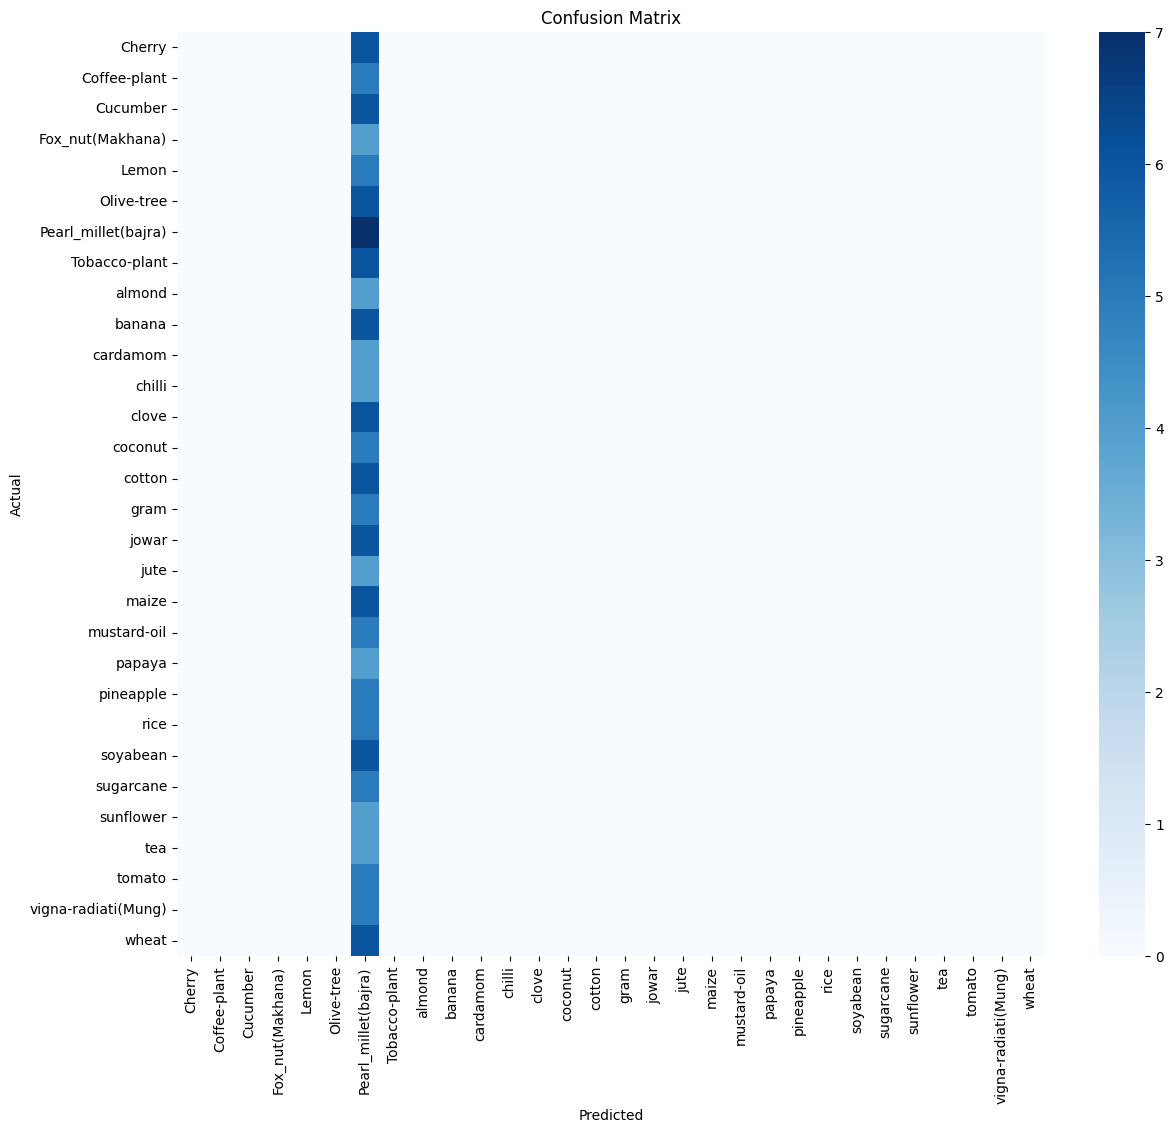

In [51]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
true_labels = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# Predict
val_generator.reset()
pred_probs = model.predict(val_generator, verbose=1)
pred_labels = np.argmax(pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(conf_mat, cmap="Blues", xticklabels=class_names, yticklabels=class_names, annot=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
from tensorflow.keras.preprocessing import image

# Provide the full path to your test image
img_path = '/kaggle/input/agricultural-crops-image-classification/Agricultural-crops/Cucumber/image (11).jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction)
predicted_class = class_names[predicted_index]
confidence = prediction[0][predicted_index]

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Pearl_millet(bajra)
Confidence: 3.64%
